In [1]:
from tensorflow import keras
import numpy as np

(xtrain,ytrain),(xtest,ytest) = keras.datasets.mnist.load_data()
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:

#create the cnn model
cnn_model =keras.models.Sequential() #empty framework
#convulational layer 1
cnn_model.add(keras.layers.Conv2D(10,3,activation='relu',input_shape=[28,28,1]))
cnn_model.add(keras.layers.MaxPooling2D(2,2))
#convulational layer 2
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D(2,2))

#feed forword network
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(200,activation='relu'))
cnn_model.add(keras.layers.Dense(200,activation='relu'))
cnn_model.add(keras.layers.Dense(200,activation='relu'))
cnn_model.add(keras.layers.Dense(len(np.unique(ytrain)))) # Output layer

# optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='sgd',loss = loss,metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 50)        4550      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 50)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1250)              0         
                                                                 
 dense_4 (Dense)             (None, 200)              

In [6]:
# train the cnn along with the validation data
history = cnn_model.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
1875/1875 [==============================] - 15s 6ms/step - loss: 0.5856 - accuracy: 0.8181 - val_loss: 0.1968 - val_accuracy: 0.9394
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1413 - accuracy: 0.9554 - val_loss: 0.1094 - val_accuracy: 0.9639
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1000 - accuracy: 0.9684 - val_loss: 0.1189 - val_accuracy: 0.9617
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0766 - accuracy: 0.9758 - val_loss: 0.0980 - val_accuracy: 0.9691
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0638 - accuracy: 0.9793 - val_loss: 0.0835 - val_accuracy: 0.9732
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0506 - accuracy: 0.9837 - val_loss: 0.0778 - val_accuracy: 0.9763
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0426 - accuracy: 0.9856 - val_loss: 0.0890 - val_accurac

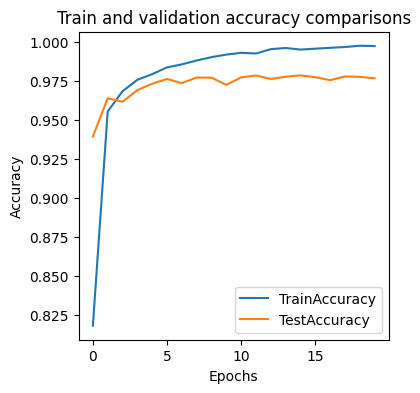

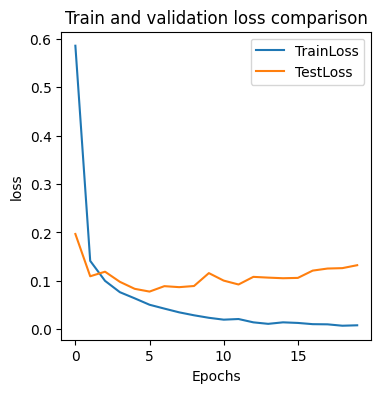

In [7]:
import matplotlib.pyplot as plt

plt.figure(1,(4,4))
plt.plot(history.epoch,history.history['accuracy'],label='TrainAccuracy')
plt.plot(history.epoch,history.history['val_accuracy'],label='TestAccuracy')
plt.title('Train and validation accuracy comparisons')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(2,(4,4))
plt.plot(history.epoch,history.history['loss'],label='TrainLoss')
plt.plot(history.epoch,history.history['val_loss'],label='TestLoss')
plt.title('Train and validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()